In [1]:
import torch
from RNN_rate_dynamics import RNNLayer

T, batch = 1000, 100
n_input, n_rnn, n_output = 10, 500, 5

rnn  = RNNLayer(n_input, n_rnn, torch.nn.ReLU(), 0.9, True)   # input_size, hidden_size, nonlinearity, decay, bias

In [4]:
import multitask

hp, log, optimizer = multitask.set_hyperparameters(model_dir='debug', hp={'learning_rate': 0.001}, ruleset='mante') #, rich_output=True)
run_model = multitask.Run_Model(hp, RNNLayer)
multitask.train(run_model, optimizer, hp, log)

Trial       0  | Time 0.00 s  | Now training contextdm1 & contextdm2
contextdm1     | cost 0.603434| c_reg 0.000000  | perf 0.21
contextdm2     | cost 0.749874| c_reg 0.000000  | perf 0.21
Trial   32000  | Time 62.09 s  | Now training contextdm1 & contextdm2
contextdm1     | cost 0.223496| c_reg 0.000000  | perf 0.46
contextdm2     | cost 0.215238| c_reg 0.000000  | perf 0.51
Optimization interrupted by user
Optimization finished!


Finally, let's visualize the results. The analysis functions are in `standard_analysis.py`

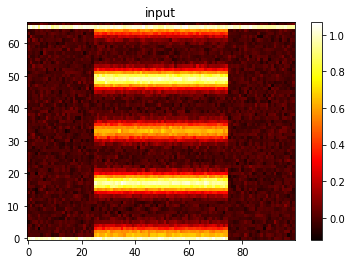

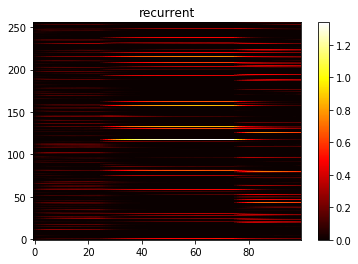

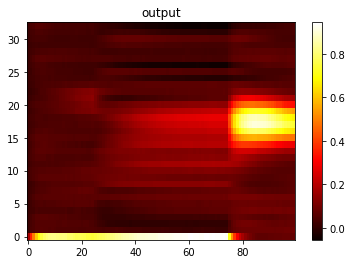

In [5]:
rule = 'contextdm1'
multitask.standard_analysis.easy_activity_plot(run_model, rule)
# multitask.standard_analysis.pretty_inputoutput_plot(run_model, rule)